<a href="https://colab.research.google.com/github/kimroxdata/Big-data-Analytics-with-Apache-Spark-and-hadoop/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression Model example**

This logistic regression model aims to perform binary classification on the breast cancer dataset from sklearn.datasets, determining whether a tumor is malignant (1) or benign (0) based on features extracted from medical measurements.

**Key Goals of the Logistic Regression Model**
1.   Modeling the Probability
*   Logistic regression doesn't just classify the data into two categories (malignant or benign); it also provides the probability of each data point belonging to a particular class.
*   The sigmoid function is used in logistic regression to map the predicted output to a value between 0 and 1, which can be interpreted as a probability.
2.   Classification
*   The model predicts whether a tumor is malignant (1) or benign (0) based on the values of its features (e.g., mean radius, mean smoothness, etc.).
*   The model uses the linear relationship between the input features and the target labels to make these predictions.
3.   Probability Thresholding


*   Once the model predicts a probability (between 0 and 1) that a tumor is
malignant, we set a threshold (commonly 0.5).
 - If the probability is greater than or equal to 0.5, we classify the tumor as malignant (1).
 - If the probability is less than 0.5, we classify it as benign (0).

The logistic regression model is trying to learn the relationship between the tumor's features (such as size, smoothness, etc.) and whether it is benign or malignant.


*   Inputs (Features): The measurements of the tumor's physical characteristics (e.g., mean radius, mean smoothness, etc.).
*   Output (Target): The classification of the tumor as benign (0) or malignant (1).



---



#**Step 1: Import Necessary Libraries**

Importing libraries needed for data manipulation, model building, and visualization.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#**Step 2: Load the Breast Cancer Dataset**

Load the Breast Cancer dataset from sklearn.datasets. This dataset contains 30 features for each tumor, such as its mean radius, texture, and smoothness. The target variable (y) represents whether the tumor is benign (0) or malignant (1).

In [ ]:
# Load the Breast Cancer dataset
data = load_breast_cancer()

# Features and target
X = data.data  # Features (30 numerical features)
y = data.target  # Target (0: benign, 1: malignant)

#**Step 3: Perform Exploratory Data Analysis (EDA)**


Perfom EDA on the dataset to derive the following insights:

*   Shape of the Dataset: Understand the number of samples and features.
*   Missing Values: Ensure there are no missing values; if any, decide on imputation or removal.
*   Statistical Summary: Understand the spread and central tendency of the features.
*   Feature Distributions: Some features may have a skewed distribution, while others may be normally distributed.
*   Correlations: Identify features that are highly correlated with each other, and decide if any feature selection or dimensionality reduction techniques (like PCA) are needed.
*   Class Distribution: Check if the dataset is imbalanced (e.g., if there are many more benign samples than malignant ones).



---

Load the breast_cancer dataset (features and targets) to a pandas data frame

In [ ]:
# Convert the dataset into a DataFrame for easy manipulation and analysis
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target labels (malignant or benign) to the DataFrame
df['target'] = data.target

**Basic Overview of the Dataset**

Look at the shape, structure, and the first few records of the dataset to get an understanding of the data.

In [ ]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the first 5 rows of the dataset to check the data structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display summary information (including data types and missing values)
print("\nDataset Info:")
df.info()

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display the distribution of the target variable (benign vs malignant)
print("\nClass distribution of target variable:")
print(df['target'].value_counts())

Shape of the dataset: (569, 31)

First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...

**Statistical Summary of the Features**

This will give insights into the central tendency (mean, median), spread (standard deviation), and range (min, max) of each feature.

In [ ]:
# Get a statistical summary of the numerical features
print("\nStatistical Summary of Features:")
print(df.describe())


Statistical Summary of Features:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000

**Visualizing Feature Distributions**

Visualizing the distribution of each feature to helps understand the spread and nature of the data. Histograms are used for each feature to see their distributions and Kernel Density Estimation (KDE) to check for normality, i.e.,


*   Histogram: Shows the frequency distribution of each feature.
*   KDE: Adds a smooth curve to understand the feature distribution better.

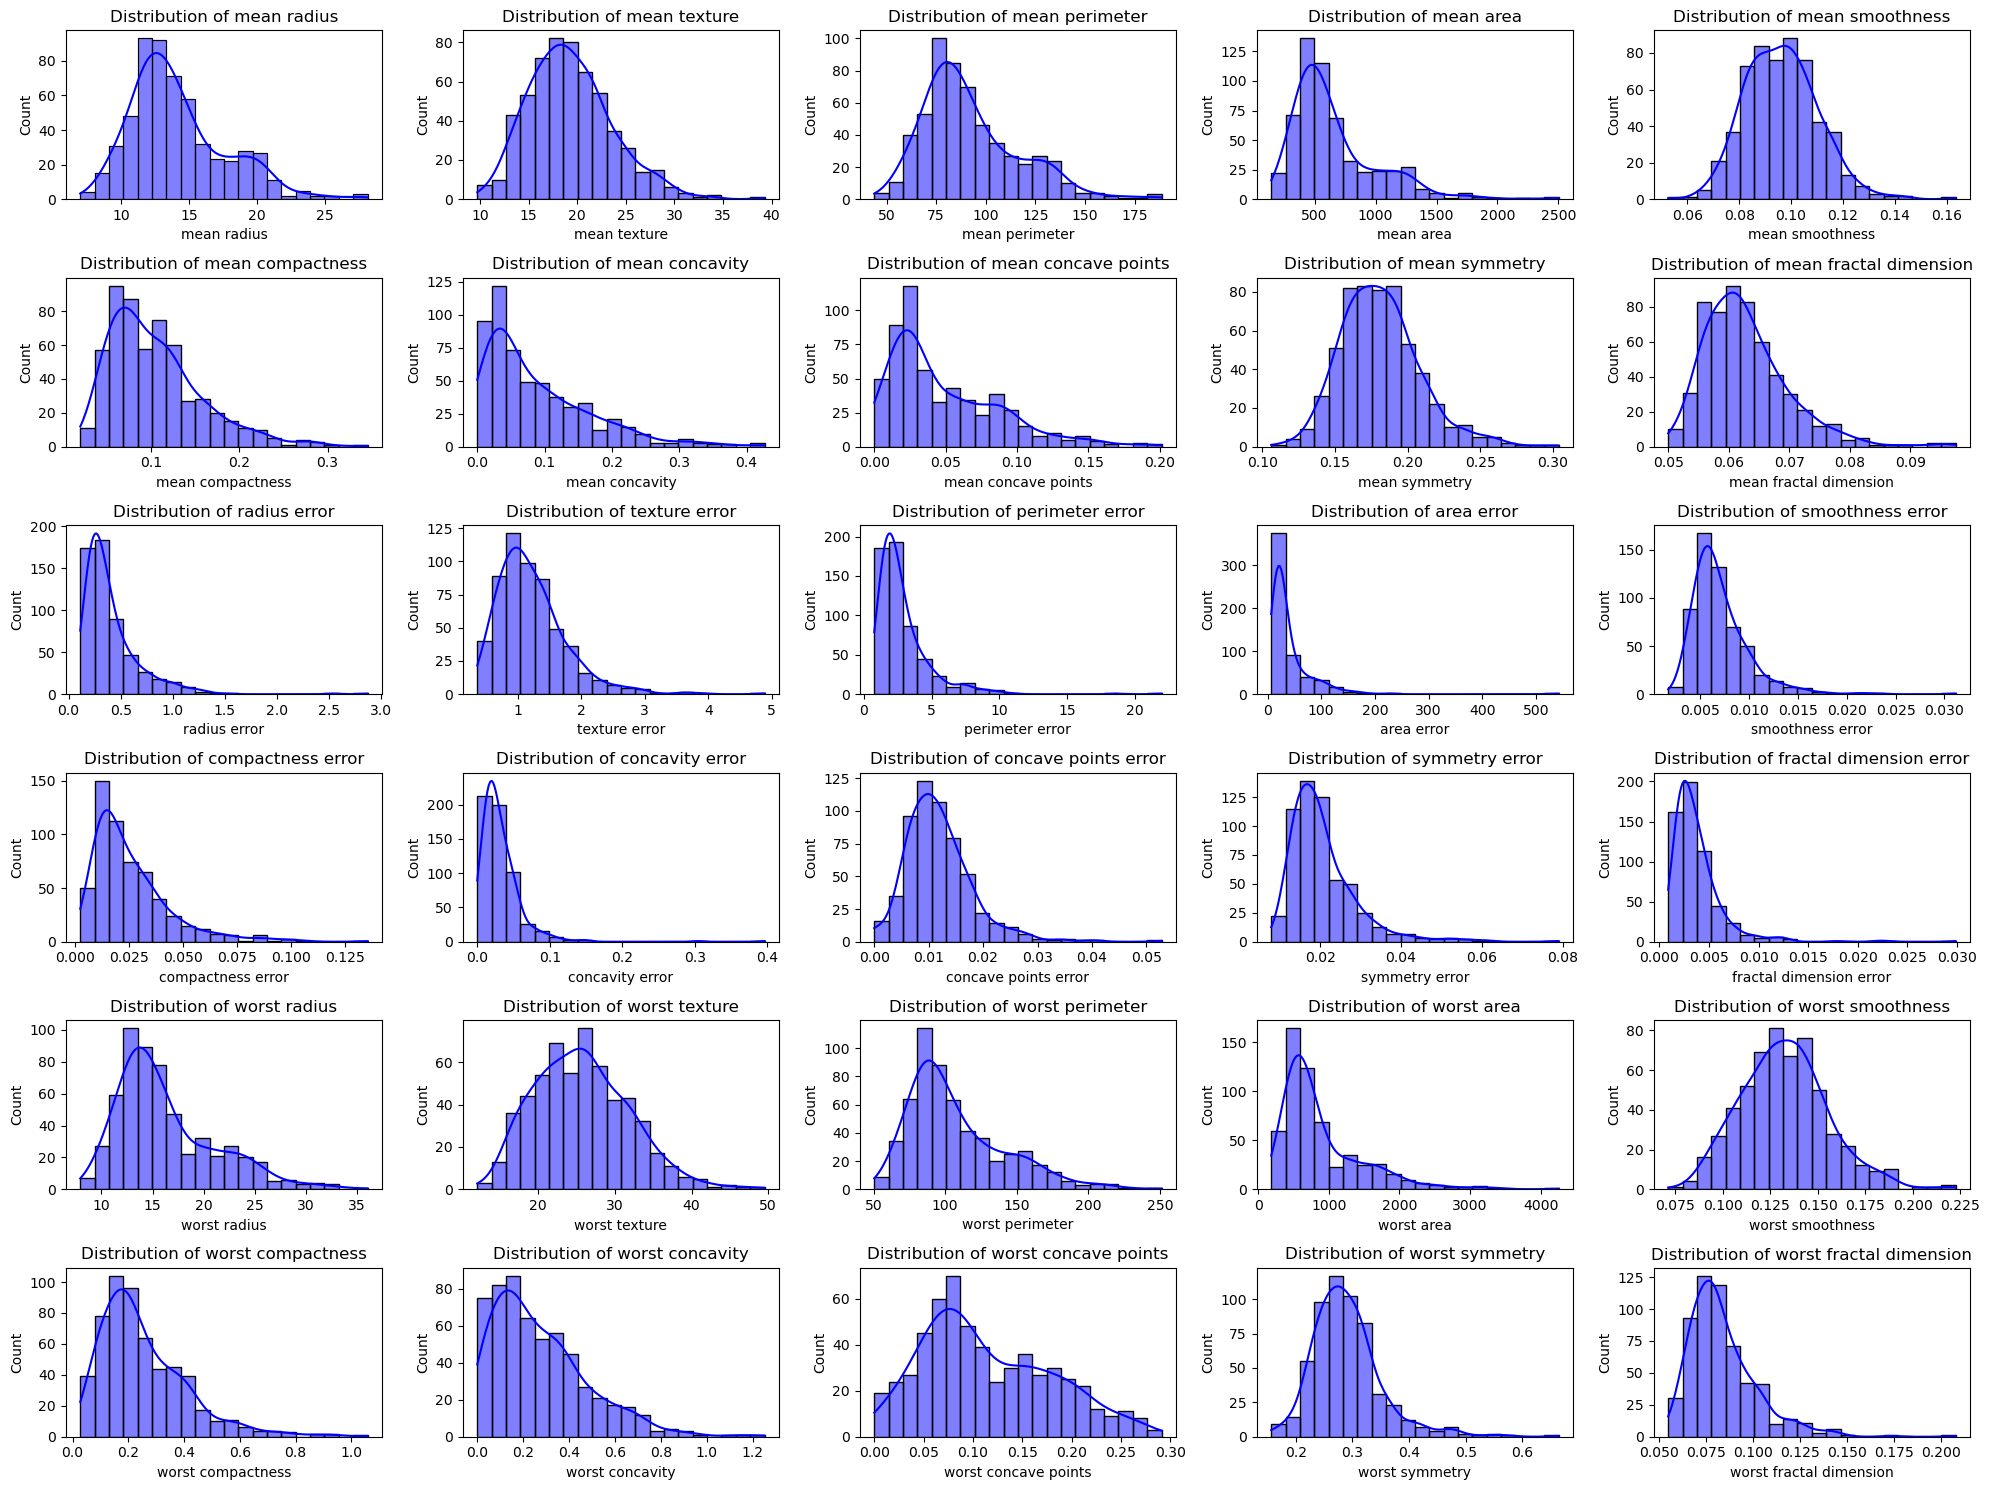

In [ ]:
# Create histograms to visualize the distribution of each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'target' column
    plt.subplot(6, 5, i)  # Arrange the plots in a grid
    sns.histplot(df[column], kde=True, color="blue", bins=20)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

# Show the plot
plt.show()

**Correlation Analysis**

To understanding how the features are correlated with each other. Highly correlated features may lead to issues like multicollinearity, which can affect the performance of some models. The correlation matrix is visualized using a heatmap, i.e.,

Correlation Heatmap: Visualizes the relationships between features. It helps identify any redundant features (highly correlated).

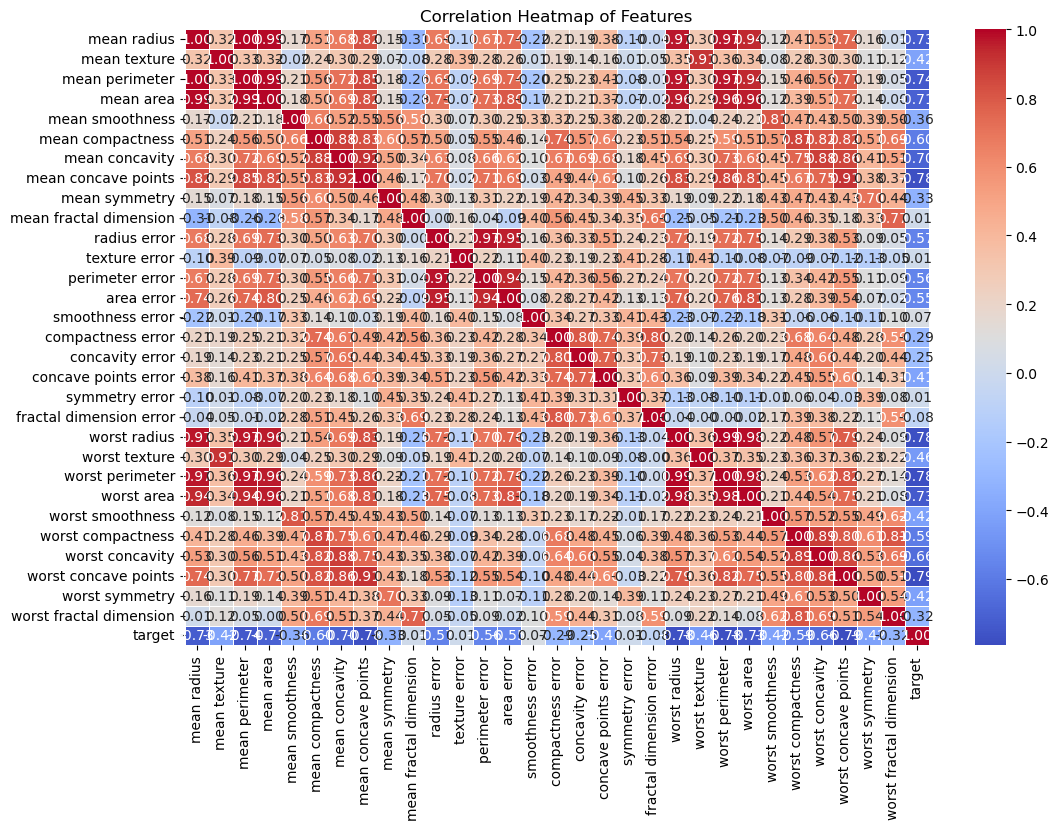

In [ ]:
# Calculate the correlation matrix for the features
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

**Visualizing the Class Distribution (Malignant vs Benign)**

Visualize the distribution of the target variable, which indicates whether the tumor is malignant or benign.

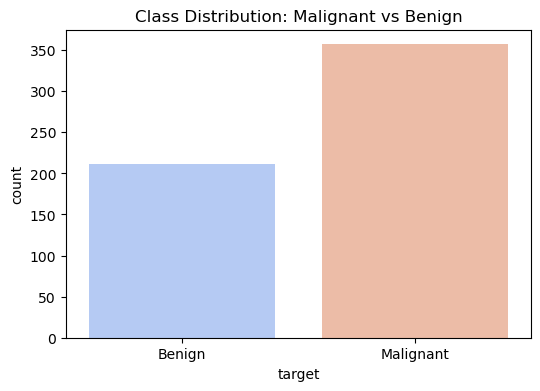

In [ ]:
# Visualizing the class distribution (Malignant vs Benign) using the hue parameter
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, hue='target', palette='coolwarm', legend=False)
plt.title('Class Distribution: Malignant vs Benign')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

#**Step 4: Split the Data into Training and Testing Sets**


*   Training data to train the model
*   Testing data to evaluate the model's performance.


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Step 5: Train the Logistic Regression Model**

Train a logistic regression model using the training data. The model will try to learn the relationship between the tumor's features and its classification (benign or malignant).

In [ ]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Train the model using the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#**Step 6: Make Predictions and Evaluate the Model**

Once the model is trained, use it to predict the class (benign or malignant) of tumors in the testing data and then evaluate its accuracy.

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.96


#**Step 7: Visualize the Sigmoid Curve**

For visualization purposes, a single feature (e.g., mean radius) has been used to demonstrate how the model's predicted probability of malignancy changes as the value of this feature changes. We plot the sigmoid curve, which represents the probability that a tumor is malignant.

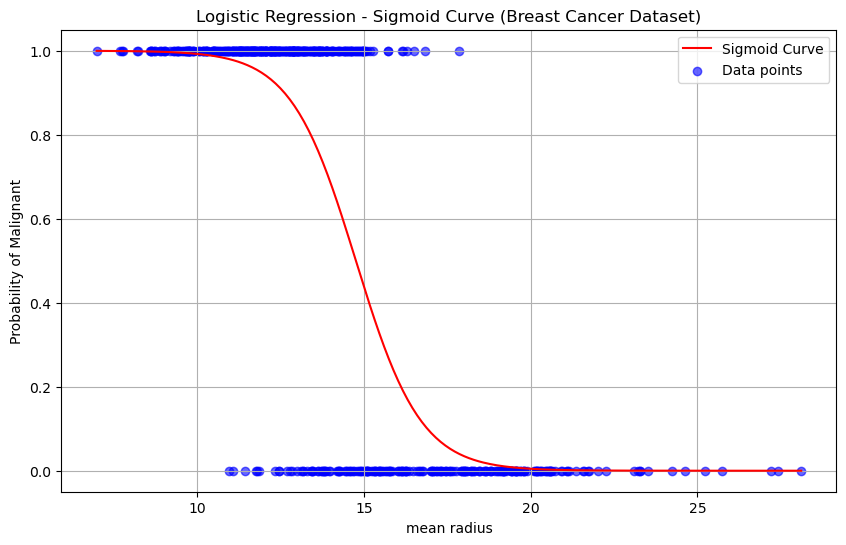

In [ ]:
# Use only one feature for visualization (e.g., mean radius, feature 0)
X_single_feature = X[:, 0].reshape(-1, 1)

# Train the logistic regression model again on this single feature
model_single_feature = LogisticRegression(max_iter=10000)
model_single_feature.fit(X_single_feature, y)

# Generate a range of values for the feature to plot the sigmoid curve
x_range = np.linspace(X_single_feature.min(), X_single_feature.max(), 300).reshape(-1, 1)
probabilities = model_single_feature.predict_proba(x_range)[:, 1]

# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(x_range, probabilities, label='Sigmoid Curve', color='red')
plt.scatter(X_single_feature, y, label='Data points', color='blue', alpha=0.6)
plt.title('Logistic Regression - Sigmoid Curve (Breast Cancer Dataset)')
plt.xlabel(data.feature_names[0])  # Feature name (mean radius)
plt.ylabel('Probability of Malignant')
plt.legend()
plt.grid()
plt.show()





---
#**Prediction Function**

A python function that uses the trained Logistic Regression model to predict whether a tumor is malignant or benign

The function accepts a list of 30 feature values and a trained logistic model as arguments, uses the model to make a prediction, and outputs whether the tumor is malignant or benign.


In [ ]:
def predict_tumor(features, model):
    """
    Predicts if a tumor is malignant or benign using a trained logistic regression model.

    Parameters:
    - features: A list or array of feature values (30 features for the breast cancer dataset).
    - model: The trained logistic regression model.

    Returns:
    - A string indicating whether the tumor is 'Malignant' or 'Benign'.
    """
    # Ensure the input is a 2D array (even if a single sample is provided)
    features = np.array(features).reshape(1, -1)

    # Use the model to make a prediction (0: Benign, 1: Malignant)
    prediction = model.predict(features)

    # Return the result based on the prediction
    return 'Malignant' if prediction == 1 else 'Benign'

Use the function to predict whether a tumor is malignant or benign by providing it with a set of feature values

In [ ]:
# Example feature values for a tumor (must match the order and number of features in the dataset), i.e:

#  example_features = [mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness, mean_compactness,
#                     mean_concavity, mean_concave_points, mean_symmetry, mean_fractal_dimension, radius_error,
#                     texture_error, perimeter_error, area_error, smoothness_error, compactness_error, concavity_error,
#                     concave_points_error, symmetry_error, fractal_dimension_error, worst_radius, worst_texture,
#                     worst_perimeter, worst_area, worst_smoothness, worst_compactness, worst_concavity, worst_concave points,
#                     worst_symmetry, worst_fractal_dimension]

example_features = [14.23, 14.87, 15.27, 17.53, 19.72, 20.57, 18.85, 19.77, 21.12, 20.14, 15.26, 15.85, 14.79,
                    16.62, 17.16, 15.88, 23.62, 15.60, 15.56, 15.69, 16.13, 16.57, 16.69, 16.16, 16.10, 16.41,
                    15.91, 16.37, 15.91, 16.11]

result = 'Invalid feature length'
if len(example_features) == 30:
  # Use the trained logistic regression model to predict whether the tumor is malignant or benign
  result = f'The tumor is: {predict_tumor(example_features, model)}'

# Output the result
print(result)


The tumor is: Benign
